### Introduction to Jupyter:

No Jupyter, tudo é uma célula. Você pode escrever códigos em Markdown, ou em alguma linguagem de programação de sua preferência, no caso desse curso, python.

Existem alguns _shortcurts_ interessantes de se conhecer:
- **A** → adicionar uma nova célula acima da selecionada.
- **B** → adicionar uma nova célula abaixo da selecionada.
- **DD** → deletar uma célula.
- **M** → altera uma célula para Markdown.
- **Y** → altera uma célula para Python.
- **CTRL + Enter** → executa uma célula.
- **SHIFT + Enter** → executa uma célula e te redireciona para outra.
- **Z** → desfaz uma alteração.
- **X** → cortar uma célula.
- **C** → copiar uma célula.
- **V** → colar uma célula.


### Working with code:

Jupyter possui funcionalidades incríveis para incluir textos e imagens e, assim, criar documentos legíveis e esteticamente atrativos. No entanto, sua principal qualidade é a capacidade de trabalhar com código. Agora, vamos importar algumas bibliotecas e iremos experimentá-las com Python. Vamos começar importando `numpy` e `matplotlib`.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- `numpy` _é a biblioteca mais popular do Python para manipulação de arrays e computação numérica._
- `matplotlib` _é a biblioteca mais conhecida de visualização dentro do ecossistema Python._

Vamos executar algumas linhas e gerar alguns gráficos:

In [4]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

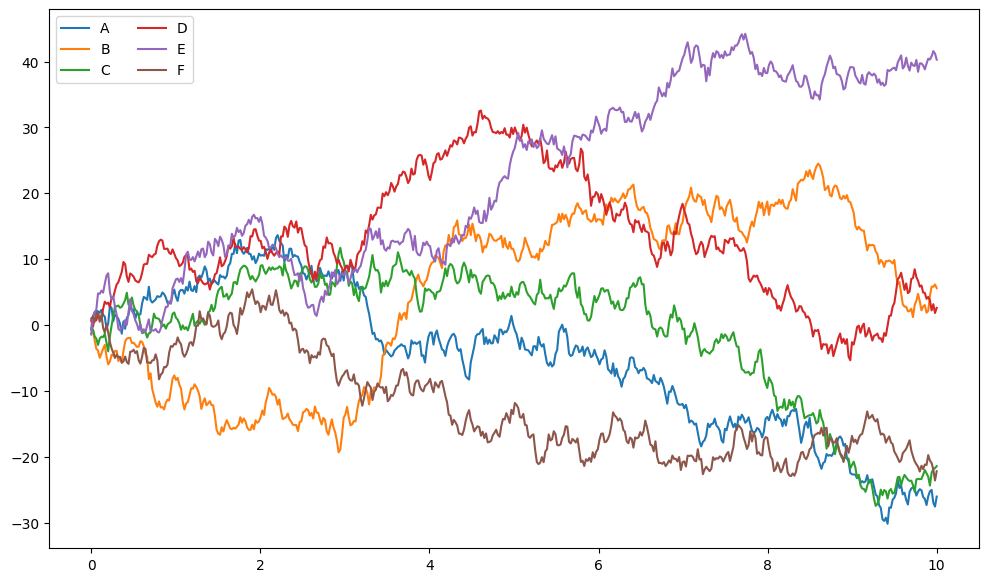

In [5]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

### Interacting with Data:

Agora, vamos puxar os preços de algumas criptomoedas usando uma API pública a baixá-los como arquivos Excel. Para isso, é preciso importar duas _libraries_: `requests` (puxar os dados da internet) e `pandas` para processá-lo.

In [6]:
import requests
import pandas as pd

In [7]:
def get_historic_price(symbol, after='2018-09-01'):
    
    url = 'https://api.kraken.com/0/public/OHLC'
    pair = f"{symbol.upper()}USD" # XBTUSD when symbol='xbt' for example
    
    resp = requests.get(url, params={
        'pair': pair,
        'interval': 60,
        'since': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    
    data = resp.json()
    
    results_key = [k for k in data['result'].keys() if k != 'last'][0]
    
    results = [
        (close_time, float(open), float(high), float(low), float(close), float(volume))
        for (close_time, open, high, low, close, vwap, volume, count)
        in data['result'][results_key]
    ]
    
    df = pd.DataFrame(results, columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume'
    ])
    
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    
    return df

Agora, vamos puxar os dados do Bitcoin e Ether, duas das mais populares criptomoedas, dos últimos 7 dias:

In [8]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2024-02-21 15:21:47.697477')

In [9]:
btc = get_historic_price('btc', after=last_week)

In [10]:
eth = get_historic_price('eth', after=last_week)

**Bitcoin:**

In [11]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-02-21 16:00:00,51145.7,51404.5,51039.4,51369.9,69.565309
2024-02-21 17:00:00,51369.9,51414.9,50903.1,50927.3,209.958854
2024-02-21 18:00:00,50927.3,51100.0,50835.6,50868.7,73.033849
2024-02-21 19:00:00,50868.6,51061.4,50688.0,51061.4,109.051364
2024-02-21 20:00:00,51062.2,51120.3,50872.7,50999.6,44.648149


In [12]:
btc.describe()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,53011.958480,53214.204678,52829.063158,53061.956140,148.294344
std,2807.643322,2969.120754,2649.907015,2850.443513,262.663159
min,50589.800000,50793.600000,50456.000000,50589.700000,3.937997
25%,51175.800000,51299.700000,51062.200000,51186.950000,28.688694
50%,51569.900000,51655.100000,51482.800000,51570.300000,73.749149
75%,54607.950000,54852.700000,54494.650000,54670.250000,158.036176
max,62470.000000,64015.800000,60976.600000,62470.000000,2713.705535


In [13]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171 entries, 2024-02-21 16:00:00 to 2024-02-28 18:00:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   171 non-null    float64
 1   HighPrice   171 non-null    float64
 2   LowPrice    171 non-null    float64
 3   ClosePrice  171 non-null    float64
 4   Volume      171 non-null    float64
dtypes: float64(5)
memory usage: 8.0 KB


<Axes: xlabel='CloseTime'>

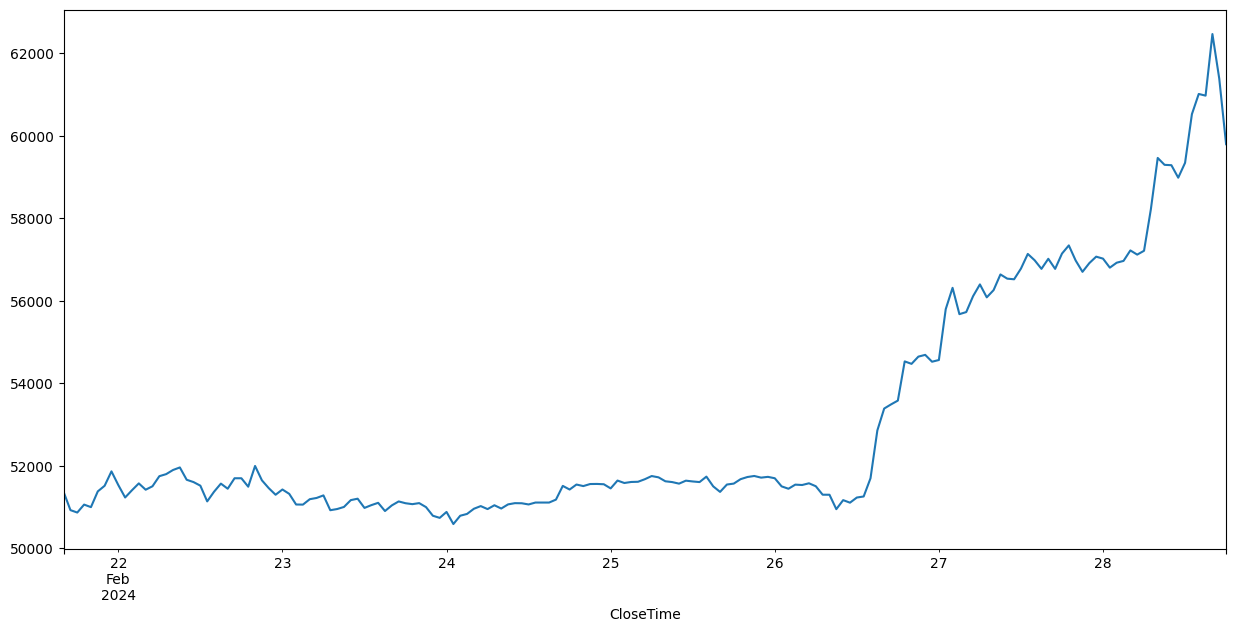

In [14]:
btc['ClosePrice'].plot(figsize=(15, 7))

**Ether:**

In [15]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
CloseTime,,,,,
2024-02-21 16:00:00,2912.73,2936.95,2897.07,2932.18,1579.662243
2024-02-21 17:00:00,2930.77,2947.34,2895.87,2898.30,3059.646965
2024-02-21 18:00:00,2898.30,2906.01,2887.49,2899.72,743.472500
2024-02-21 19:00:00,2899.30,2913.72,2892.01,2912.74,513.371098
2024-02-21 20:00:00,2912.75,2915.47,2900.60,2908.12,515.137394


<Axes: xlabel='CloseTime'>

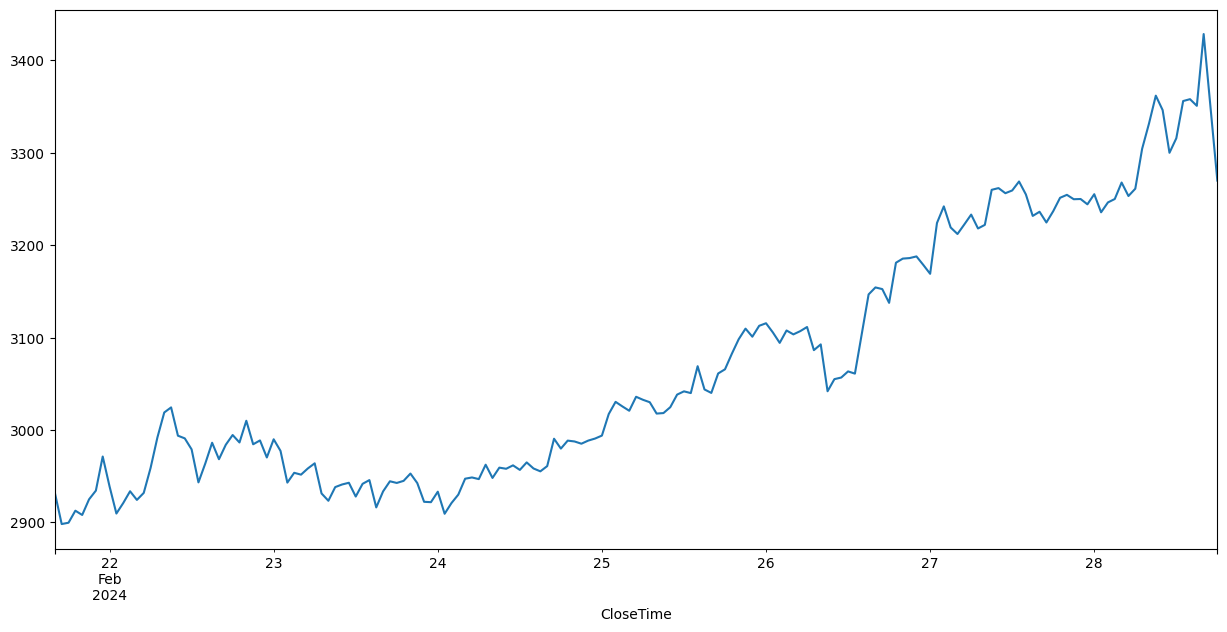

In [16]:
eth['ClosePrice'].plot(figsize=(15, 7))

### Bonus: Dynamic plots with Bokeh

Também incluímos  **Bokeh** como uma parte da distribuição principal. Bokeh é um gráfico de construção de gráficos que gera plotagens interativas, que podem ser manipuladas diretamente no browser.

Primeiramente, precisamos importar essas bibliotecas:

In [17]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [18]:
output_notebook()

Loading BokehJS ...

Assim, conseguimos gerar os gráficos:

In [19]:
p1 = figure(x_axis_type='datetime', title='Crypto Prices', width=800)
p1.grid.grid_line_alpha = 0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Date'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')


show(p1)


### Exporting to Excel

Agora, estamos preparados para gerar um arquivo Excel com base nos preços das criptomoedas. Trabalhar com Excel e outros formatos (como CSV ou JSON) é muito mais simples com Jupyter (graças ao pandas e ao Python). Nosso primeiro passo é criar um "_Excel Writer_", um componente do pacote `pandas`:

In [20]:
with pd.ExcelWriter('cryptos.xlsx', engine='openpyxl') as writer:
    btc.to_excel(writer, sheet_name='Bitcoin')
    eth.to_excel(writer, sheet_name='Ether')